# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

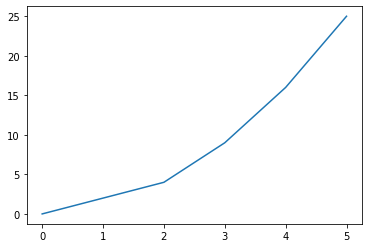

In [2]:
plt.plot([0,1,2,3,4,5], [0,2,4,9,16,25])

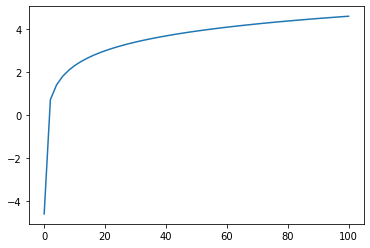

In [3]:
xs = np.linspace(0.01,100)
ys = np.log(xs)
plt.plot(xs,ys)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


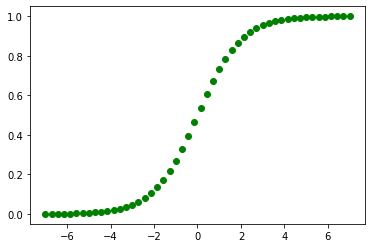

In [11]:
def logisticFunction(x):
    y = (np.exp(x))/(1+np.exp(x))
    plt.plot(x,y, 'go') 

x = np.linspace(-7,7)
logisticFunction(x)

### Scatter plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


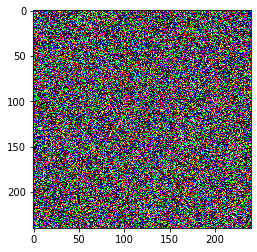

In [14]:
xs = np.random.randn(240,240,3) #imagen aleatoria
plt.imshow(xs)

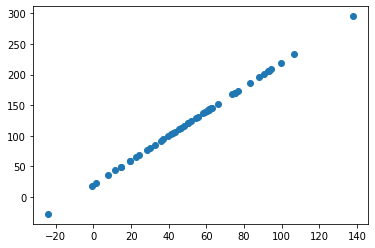

In [15]:
xs = np.random.randn(50) * 30 + 50
ys = 2*xs + 20

plt.scatter(xs,ys)

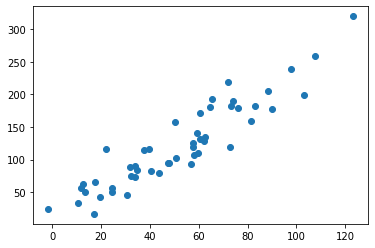

In [18]:
xs = np.random.randn(50) * 30 + 50
ys = 2*xs + 20 + np.random.randn(50) * 30

plt.scatter(xs,ys)

### Bar plots

Do not confuse with histograms

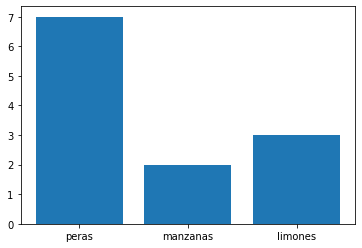

In [23]:
plt.bar(range(3), [7 ,2 ,3])
plt.xticks(range(3),['peras','manzanas','limones']);

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

(25, 50)

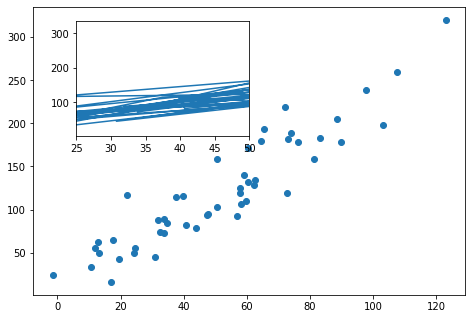

In [45]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.1,0.55,0.4,0.4])

axes1.scatter(xs,ys)
axes2.plot(xs,ys)
axes2.set_xlim(25,50)

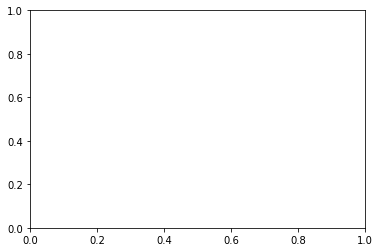

In [47]:
plt.gcf()
plt.gca()

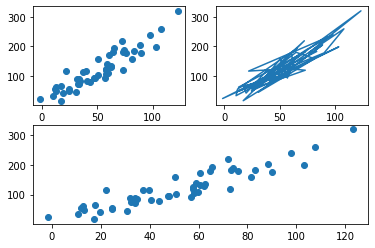

In [58]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(2,2,2)
axes3 = f.add_subplot(2,1,2)


axes1.scatter(xs,ys)
axes2.plot(xs,ys)
axes3.scatter(xs,ys)

/home/carcrupe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


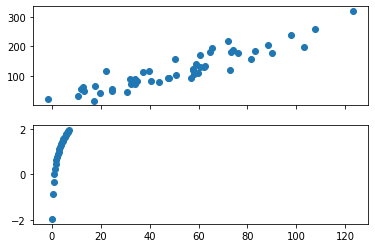

In [69]:
f, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(xs,ys)
ax[1].scatter(x,np.log(x))

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

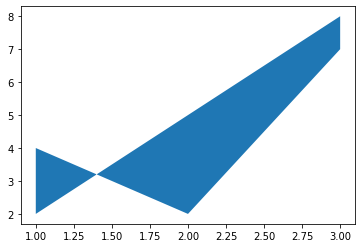

In [70]:
plt.fill_between([1,2,3], [4,2,7], [2,5,8])

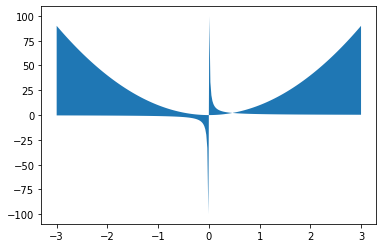

In [74]:
xs = np.linspace(-3,3,300)
plt.fill_between(xs, 10*xs**2, 1/xs) #rellena las zonas entre las dos funciones

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

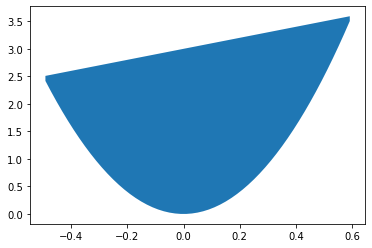

In [77]:
plt.fill_between(xs, 10*xs**2, xs + 3, (xs+3)>(10*xs**2))

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



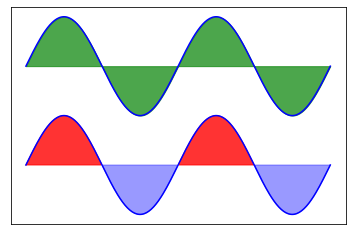

In [107]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)

plt.fill_between(X, Y+1, 1, color='green', alpha=0.7)
plt.fill_between(X, Y-1, -1, color='red', alpha=0.8, where=(Y-1>-1));
plt.fill_between(X, Y-1, -1, color='blue', alpha=0.4, where=(Y-1<-1));
plt.xticks([])
plt.yticks([]); #quito las etiquetas de los ejes
plt.savefig('sine_filled.png')

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

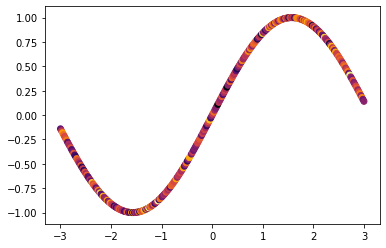

In [114]:
from matplotlib import cm
cmap = cm.get_cmap('inferno')
plt.scatter(xs, np.sin(xs), c=np.random.randn(len(xs)), cmap=cmap);

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)

```

![Color exercise](figs/scatter_ex.png)

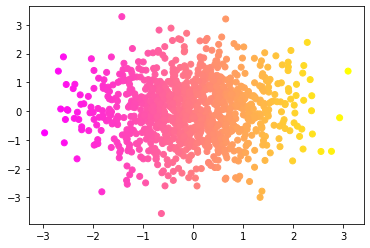

In [116]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap=cm.get_cmap('spring')

plt.scatter(X,Y, c=X, cmap=cmap)

### Markers and linestyles

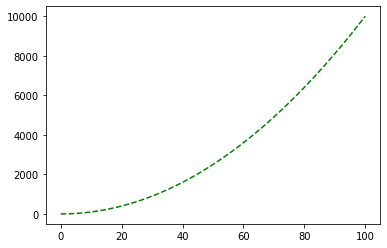

In [117]:
xs = np.linspace(0,100)
ys = xs**2
plt.plot(xs,ys,'g--')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

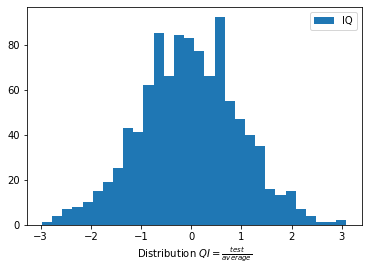

In [125]:
plt.hist(X, bins=30, label='IQ');
plt.xlabel(r'Distribution $QI=\frac{test}{average}$');
plt.legend()

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

$$\mu = \frac{\sum_{i=1}^nx_i}{n}$$

## Ticks, tick labels, limits

### Ticks

[Text(0, 0, 'hola'), Text(0, 0, 'servus')]

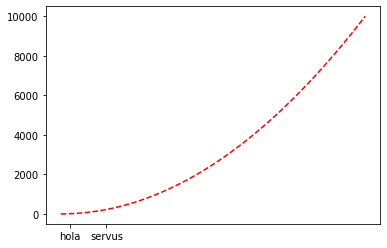

In [130]:
plt.plot(xs,ys,'r--')
ax = plt.gca()
ax.set_xticks([3,15])
ax.set_xticklabels(['hola','servus'])

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [9]:
df = pd.read_csv('houses.csv', index_col=0)

short_column_names = ['local_prices', 'bathrooms', 'site_area', 
                      'living_area', 'garages', 'rooms', 
                      'bedrooms', 'age', 'construction_type', 
                      'architecture', 'fireplaces', 'price']
df.columns = short_column_names
df

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
index,,,,,,,,,,,,
1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9


In [6]:
import seaborn as sns
sns.jointplot(df['site_area'], df['price'])

NameError: name 'df' is not defined

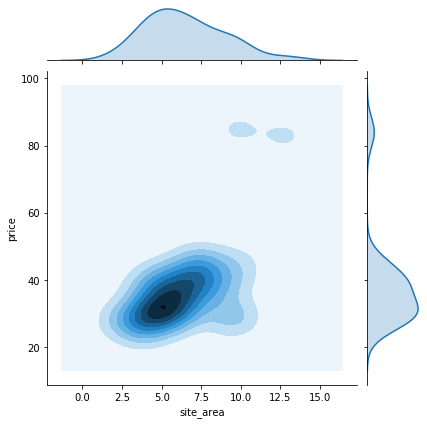

In [12]:
sns.jointplot(data=df, x='site_area', y='price', kind='kde') #equivale a lo anterior pero cambiando parámetros predefinidos

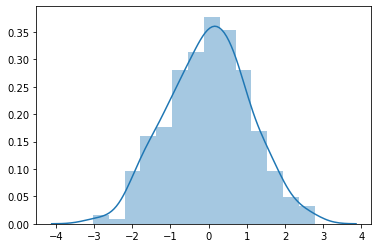

In [15]:
sns.distplot(np.random.randn(300))

## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

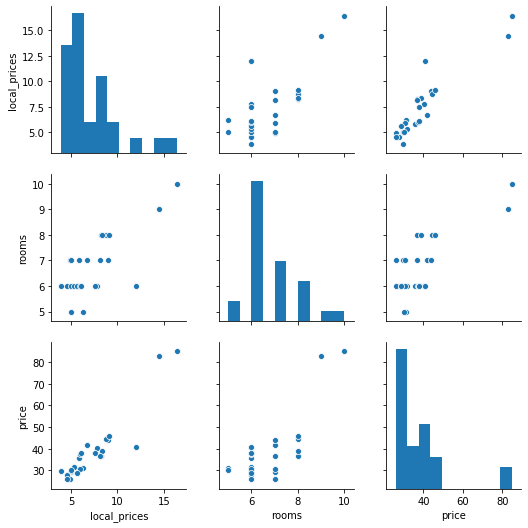

In [23]:
smaller = df[['local_prices','rooms', 'price']]
sns.pairplot(smaller)

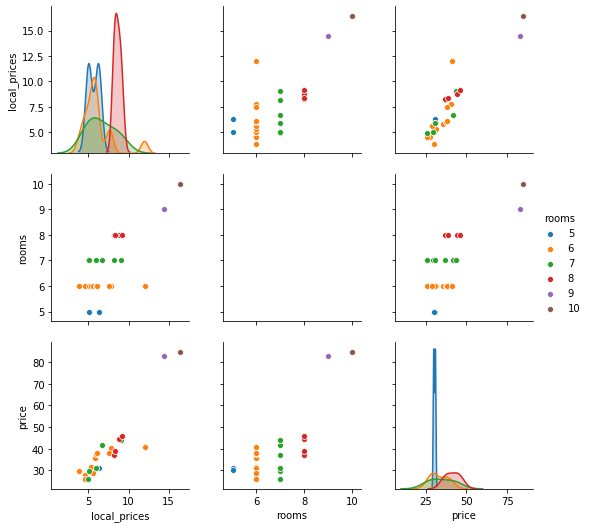

In [25]:
sns.pairplot(smaller, diag_kind='kde', hue='rooms');

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

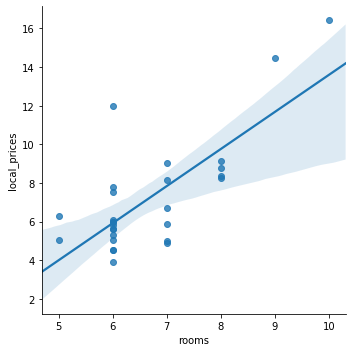

In [27]:
sns.lmplot(data=smaller, x='rooms', y='local_prices')

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [5]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Swarm plot

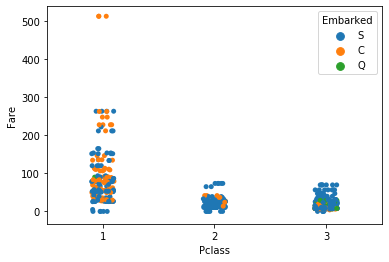

In [8]:
sns.stripplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

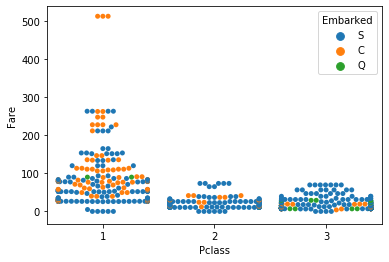

In [9]:
sns.swarmplot(data=titanic, x='Pclass', y='Fare', hue='Embarked')

### Boxplot

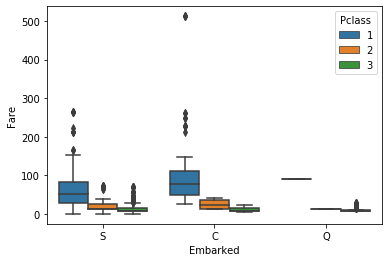

In [13]:
sns.boxplot(data=titanic, x='Embarked', y='Fare', hue='Pclass');

### Barplot / countplot

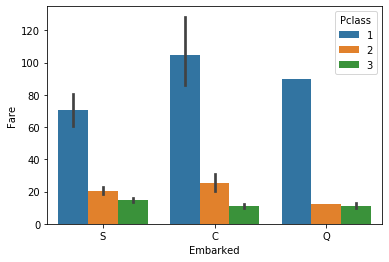

In [14]:
sns.barplot(data=titanic, x='Embarked', y='Fare', hue='Pclass');

### Pointplot

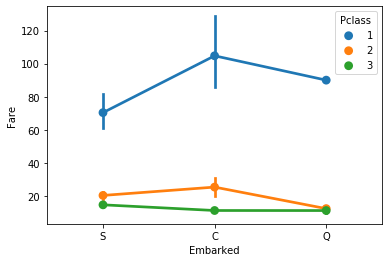

In [15]:
sns.pointplot(data=titanic, x='Embarked', y='Fare', hue='Pclass');

## Other types

### Heatmap

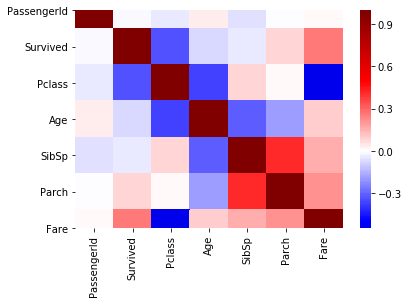

In [20]:
from matplotlib import cm
cmap = cm.get_cmap('seismic')

sns.heatmap(titanic.corr(), cmap=cmap, center=0);

### Clustermap

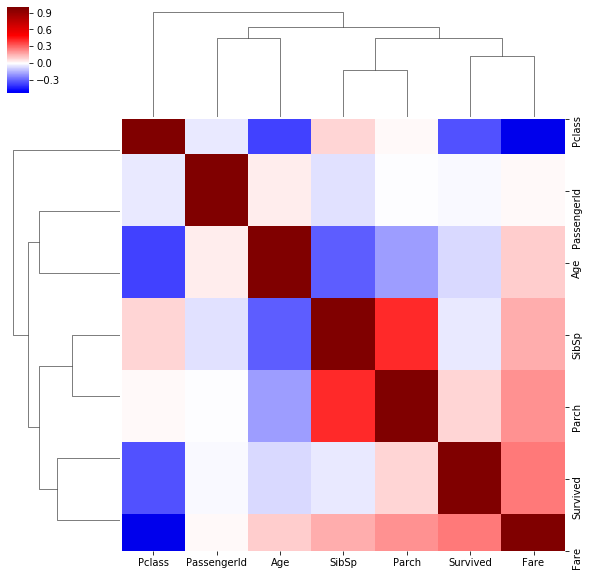

In [21]:
sns.clustermap(titanic.corr(), cmap=cmap, center=0);

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)